# Importing pyhton libraries

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Read the data

In [265]:
df = pd.read_csv('Leads.csv')
original_data = df.copy()

# Dataframe summary

In [266]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [267]:
# Shape of dataframe
df.shape

(9240, 37)

In [268]:
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [269]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning

### Miissing values treatment

In [270]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [271]:
df_null = round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)
df_null

,0
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Activity Index,45.65
Asymmetrique Profile Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


In [272]:
# Drop column having more then 40% null value.
col = df_null[df_null.values > 40].index
df.drop(col, axis=1, inplace=True)

In [273]:
# drop 'Prospect ID','Lead Number' as it is of no use
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [274]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [275]:
# Lets bifurcate the dataframe to converted and not converted for some other missing value imputation
df_converted = df[df['Converted']==1]
df_not_converted = df[df['Converted']==0]

In [276]:
# Fill NaN values in 'Country' column with mode value
df['Country'] = df['Country'].fillna('country not define')

In [277]:
# Fill NaN values in 'Specialization' column with mode value
df['Specialization'] = df['Specialization'].fillna('specialization not define')

In [278]:
# Fill NaN values in 'occupation' column with mode value
df['What is your current occupation'] = df['What is your current occupation'].fillna('occupation not define')

In [279]:
# Fill NaN values in 'Tags' column with mode value
df['Tags'] = df['Tags'].fillna('current lead status not define')

In [280]:
# Fill NaN values in 'City' column with mode value
df['City'] = df['City'].fillna('city not define')

In [281]:
# Fill NaN values in 'What matters most to you in choosing a course	' column with mode value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('no matters')

In [282]:
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [283]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [284]:
# drop all rows with null value
df = df.dropna()

In [285]:
# Check final null value
print(round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False))

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

### Checking for ourliers

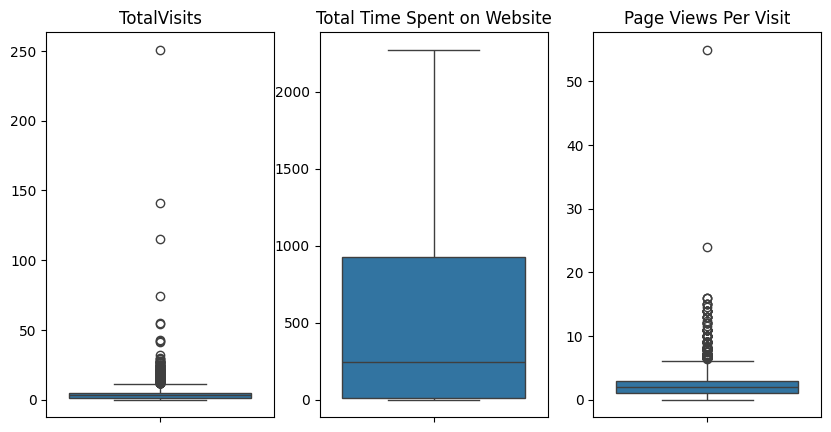

In [286]:
# plot boxplot for numerical columns
col_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(10,5))
for col,i in zip(col_num,range(1,4)):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.ylabel("")

In [287]:
df[col_num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.454575,483.773921,2.368972
std,4.851123,545.519186,2.157526
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,924.000000,3.000000
max,251.000000,2272.000000,55.000000


In [288]:
# 99 percentile in numerical columns
df[col_num].quantile(0.99)

,0.99
TotalVisits,17.0
Total Time Spent on Website,1839.0
Page Views Per Visit,9.0


In [289]:
# capping of outliers to 99 percentile value.

df['TotalVisits'] = df['TotalVisits'].apply(lambda x: 17 if x > 17 else x)
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].apply(lambda x: 1839 if x > 1839 else x)
df['Page Views Per Visit'] = df['Page Views Per Visit'].apply(lambda x: 9 if x > 9 else x)

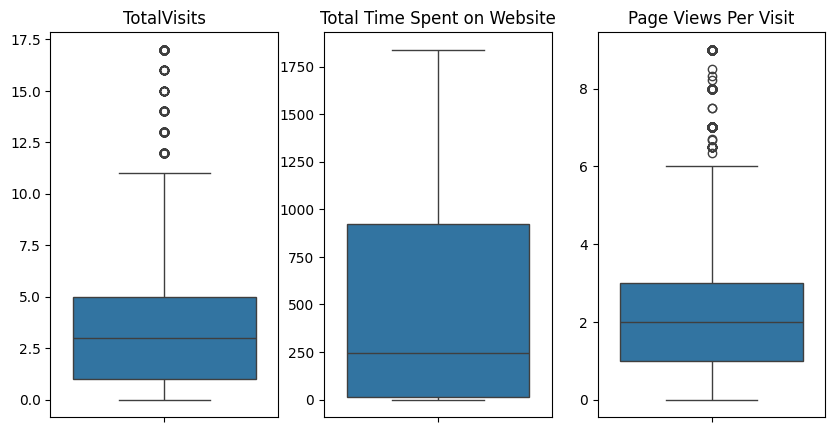

In [290]:
# plot boxplot for numerical columns
col_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(10,5))
for col,i in zip(col_num,range(1,4)):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.ylabel("")

# Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='Converted'>

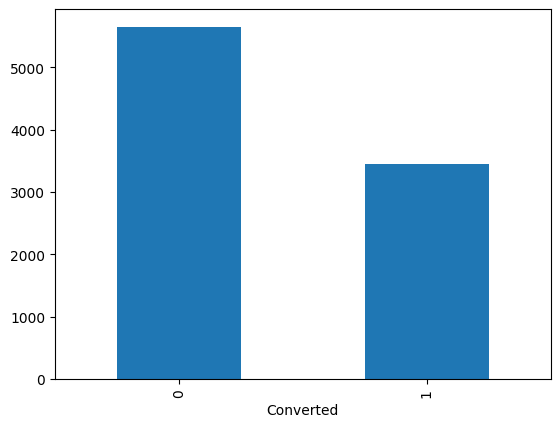

In [291]:
# check value counts of converted column

df['Converted'].value_counts().plot(kind='bar')

In [292]:
# user define function to visualize counting of a categorical data

def cat_bar (category):
    plt.figure(figsize=(10,6))
    crtb = df[category].value_counts(normalize=True).plot.bar()
    plt.ylabel('Count')
    plt.grid(True)
    plt.xticks(rotation=90)

    for p in crtb.patches:
        crtb.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.show()

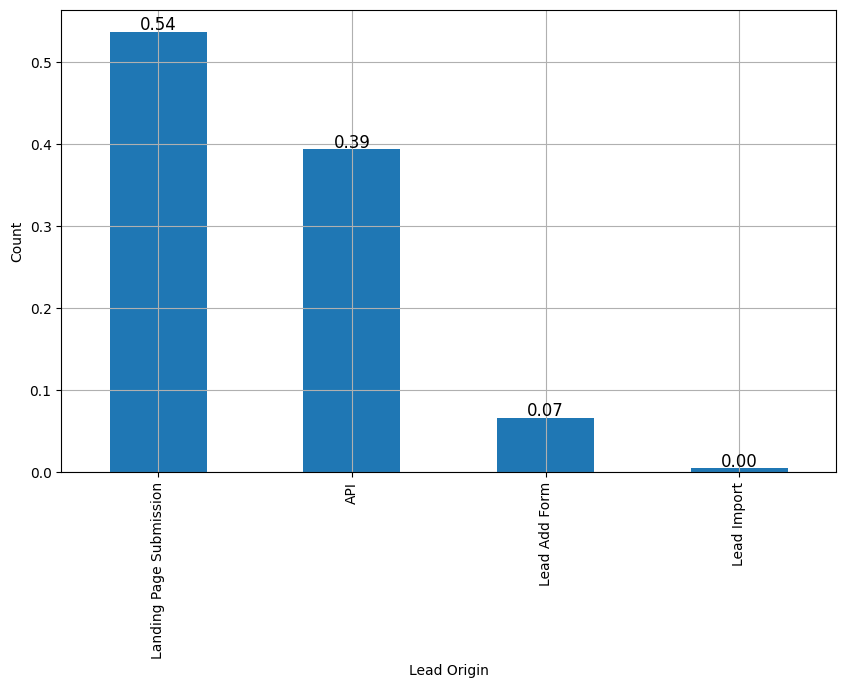

In [293]:
cat_bar('Lead Origin')

** Most of the Lead Origin are from Landing Page Submission

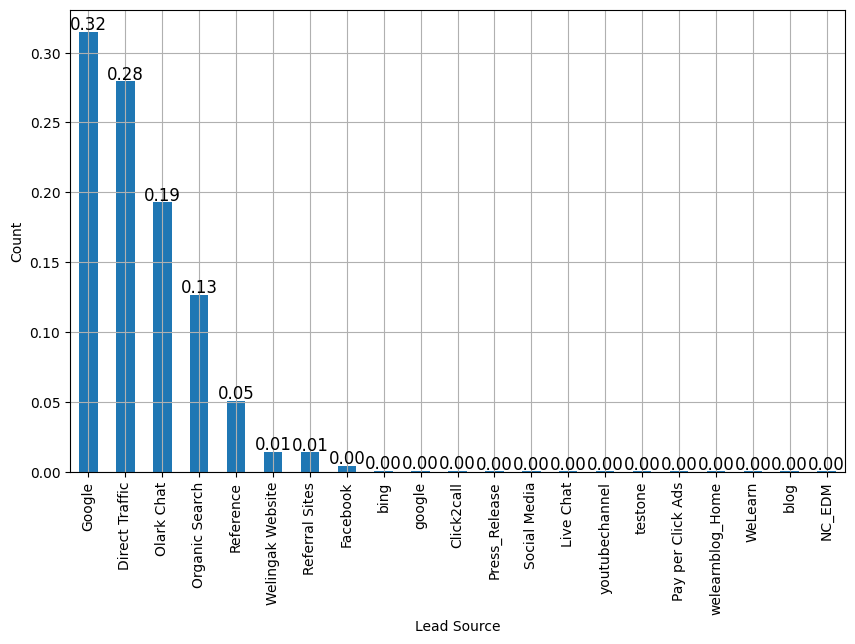

In [294]:
cat_bar('Lead Source')

** Most lead are sourced from Google and Direct Traffic

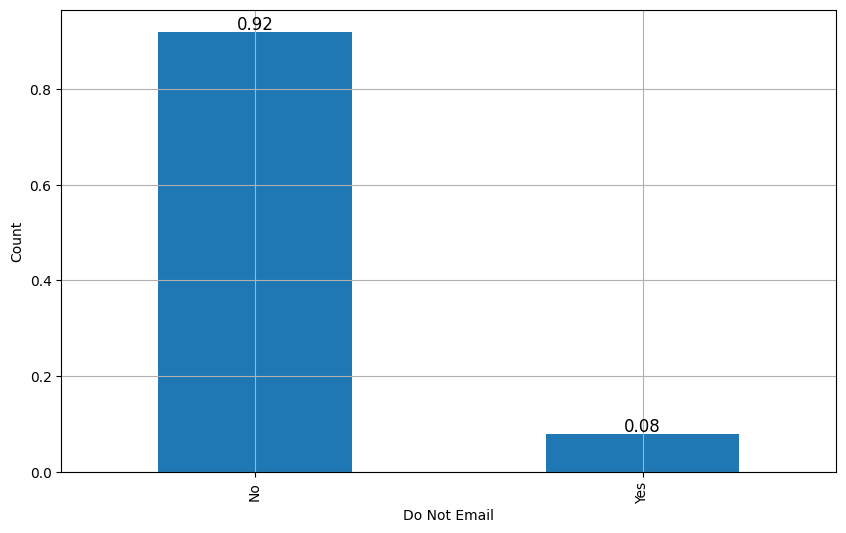

In [295]:
cat_bar('Do Not Email')

** Most customer allow to mail them

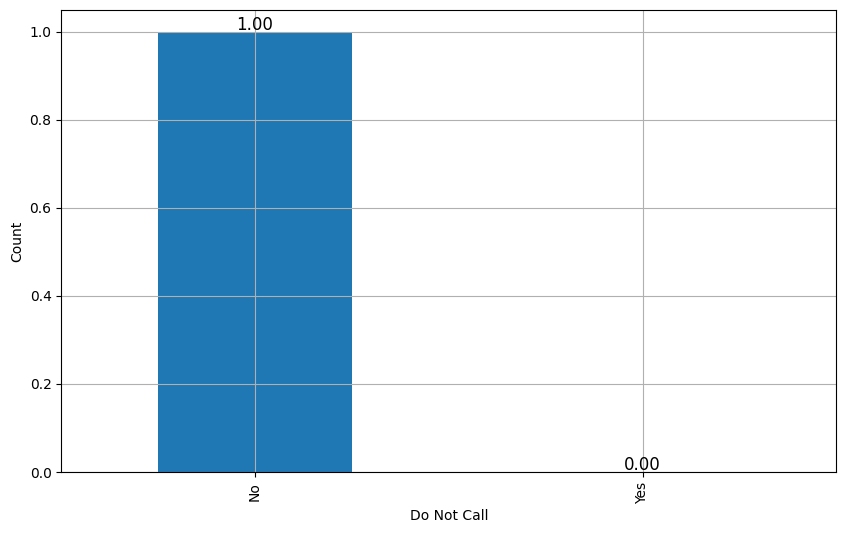

In [296]:
cat_bar('Do Not Call')

** All leads allow to call them in future

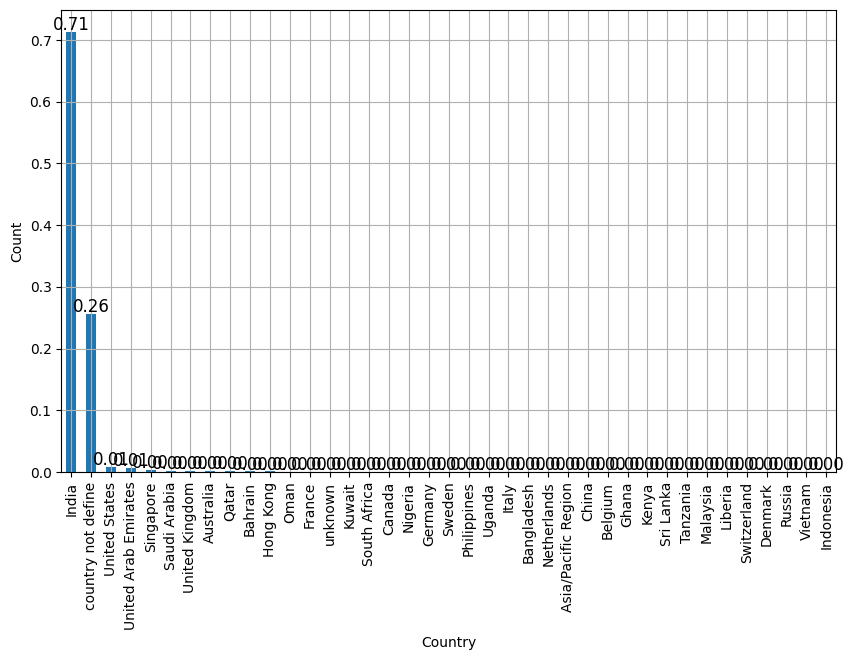

In [297]:
cat_bar('Country')

** Majority of leads are from india.

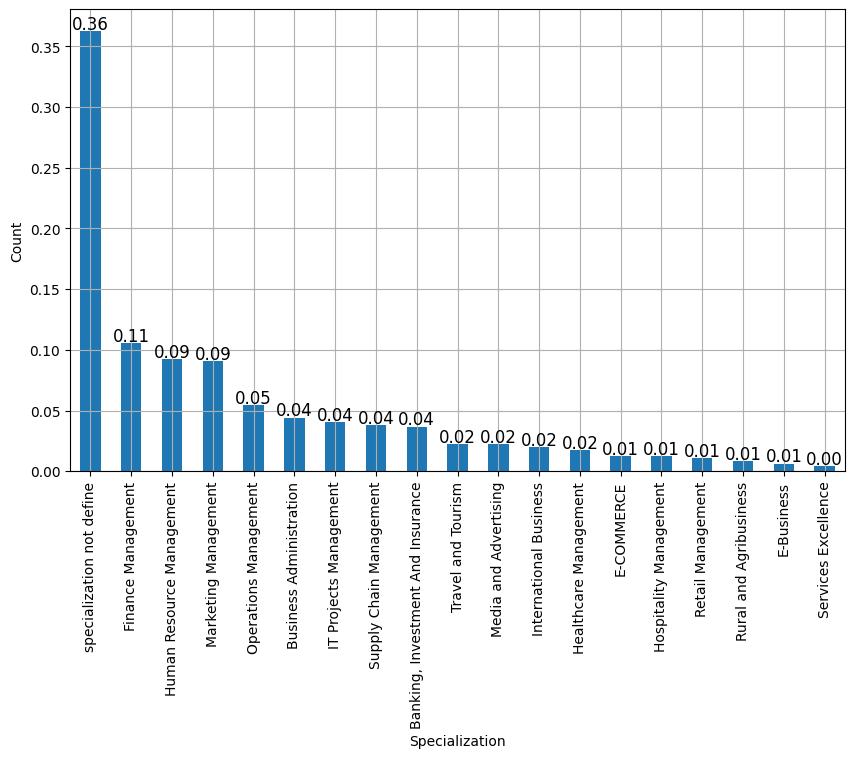

In [298]:
cat_bar('Specialization')

** Around 36 % leads have not metioned their specialization .11% leads are from Finance management.next major leads are from Human Resource Management and Marketing management

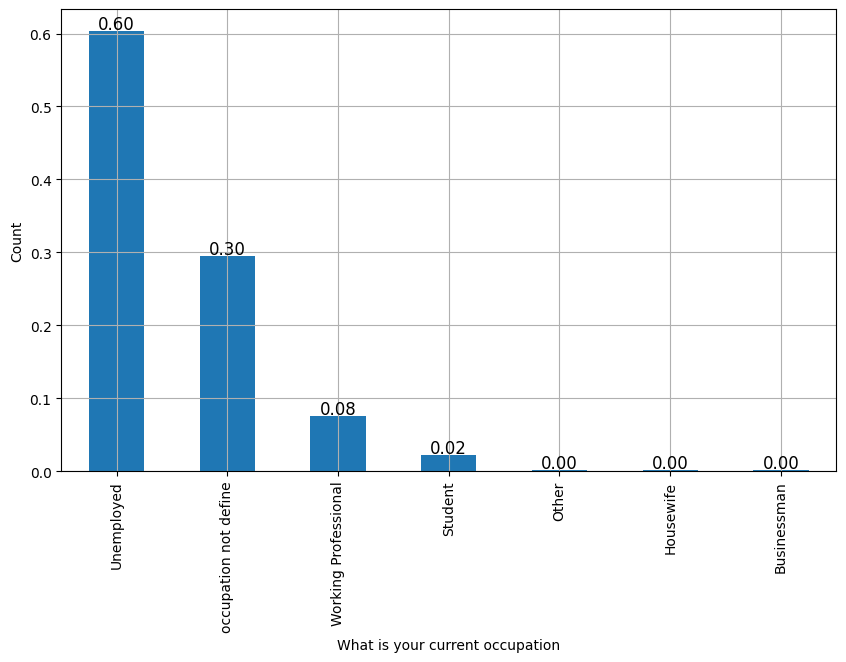

In [299]:
cat_bar('What is your current occupation')

** Majority of leads are either unemployed or dont want to mentioned their occupation.

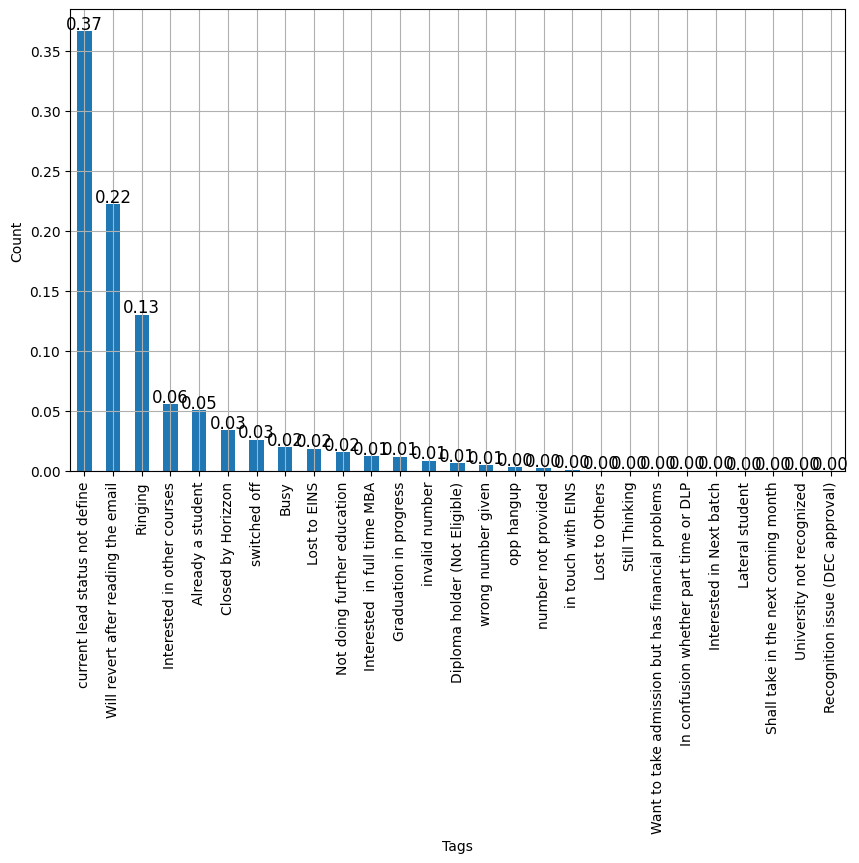

In [300]:
cat_bar('Tags')

In [301]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,country not define,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,city not define,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,city not define,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Segmented univariate analysis

In [302]:
def cat_bar (category):
    plt.figure(figsize=(8,4))
    crtb = pd.crosstab(df[category],df['Converted']).reset_index()
    crtb = crtb.melt(id_vars=category)
    sns.barplot(data=crtb,x=category,y='value',hue='Converted')
    plt.ylabel('Count')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()

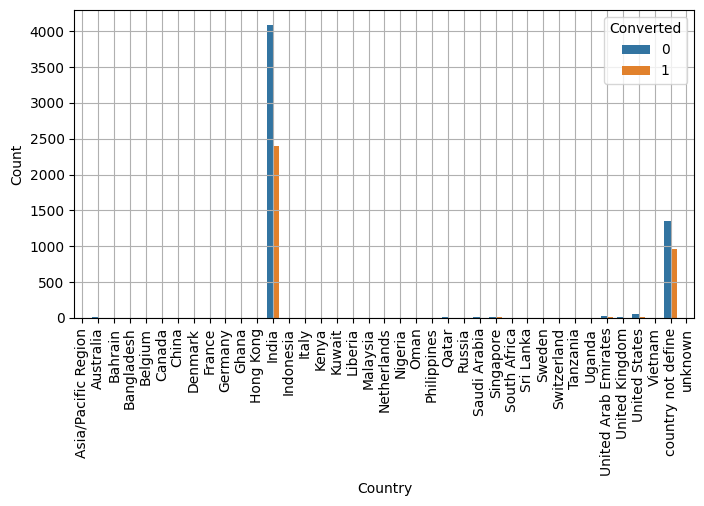

In [303]:
cat_bar('Country')

In [304]:
# replace other then india and country not define as other country
df['Country'] = df['Country'].apply(lambda x: 'Other' if x != 'India' and x != 'country not define' else x)

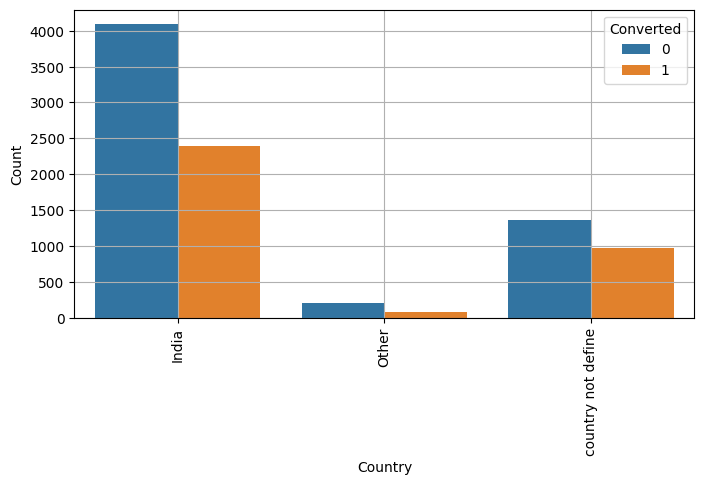

In [305]:
cat_bar('Country')

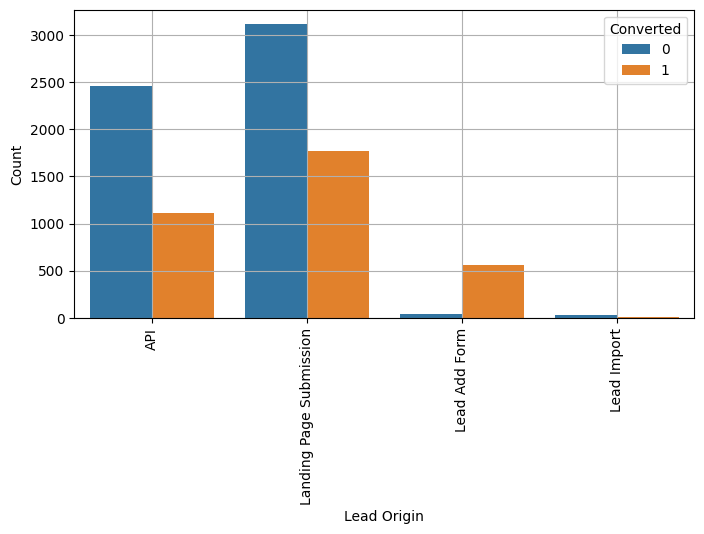

In [306]:
cat_bar('Lead Origin')

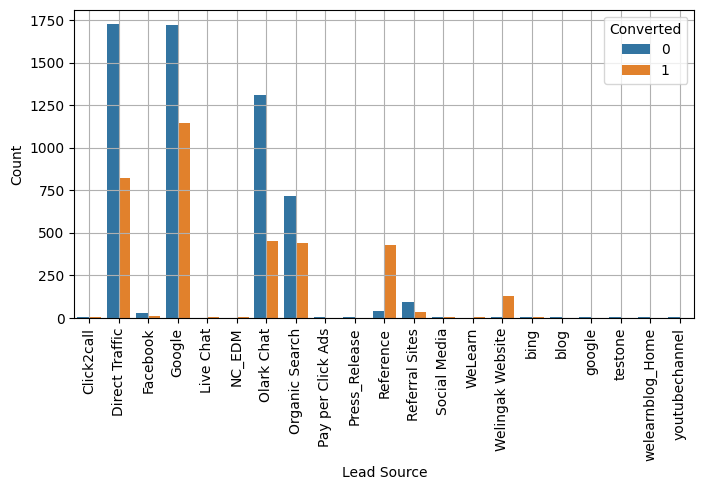

In [307]:
cat_bar('Lead Source')

In [308]:
# replace google with Google in Lead Source
df['Lead Source'] = df['Lead Source'].apply(lambda x: 'Google' if x == 'google' else x)

# Replace Live Chat,NC_EDM,Pay Per Click Ads,Press_Release,WeLearn,bing,blog,testone,welearnnlog_Home,youtubechannel as others
df['Lead Source'] = df['Lead Source'].apply(lambda x: 'others' if x not in ['Google','Direct Traffic','Facebook','Olark Chat','Organic Search','Reference'] else x)

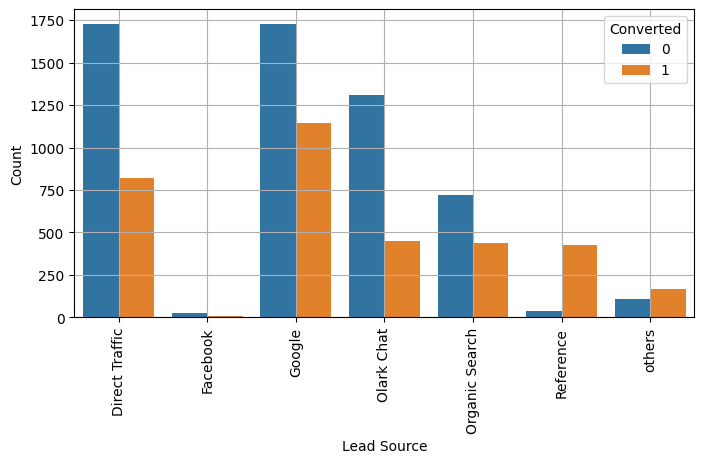

In [309]:
cat_bar('Lead Source')

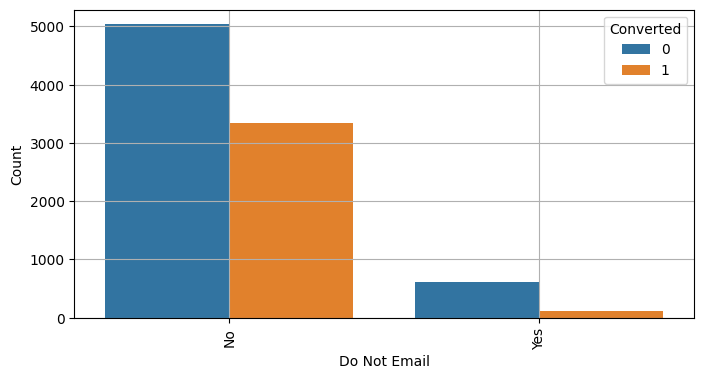

In [310]:
cat_bar('Do Not Email')

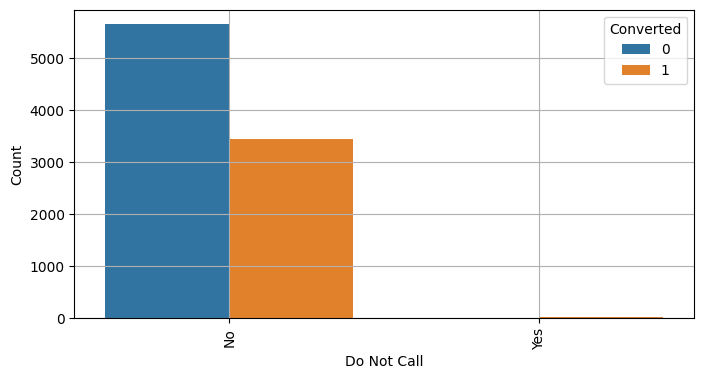

In [311]:
cat_bar('Do Not Call')

** Do Not Call column Can be dropped

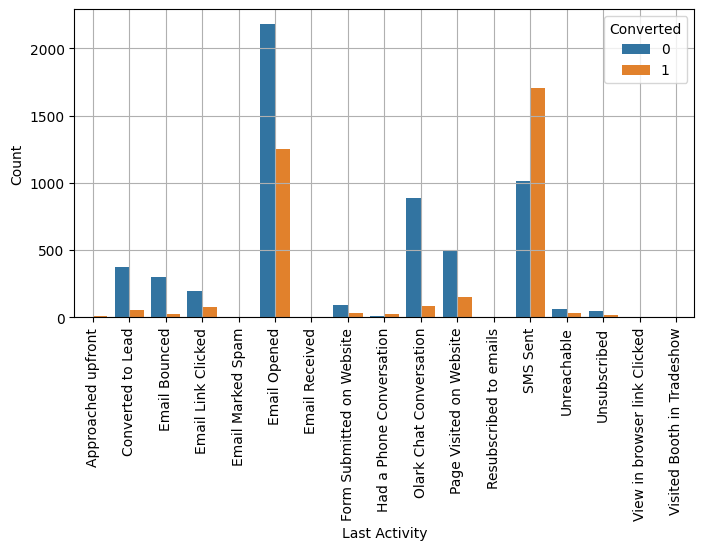

In [312]:
cat_bar('Last Activity')

In [313]:
# change to others if the value not equal 'Converted to Lead','Email Bounced','Email Link Clicked','Email Opened','Form Submitted on Website','Olark Chat Conversation','Page Visited on Website','SMS Sent'
df['Last Activity'] = df['Last Activity'].apply(lambda x: 'others' if x not in ['Converted to Lead','Email Bounced','Email Link Clicked','Email Opened','Form Submitted on Website','Olark Chat Conversation','Page Visited on Website','SMS Sent'] else x)

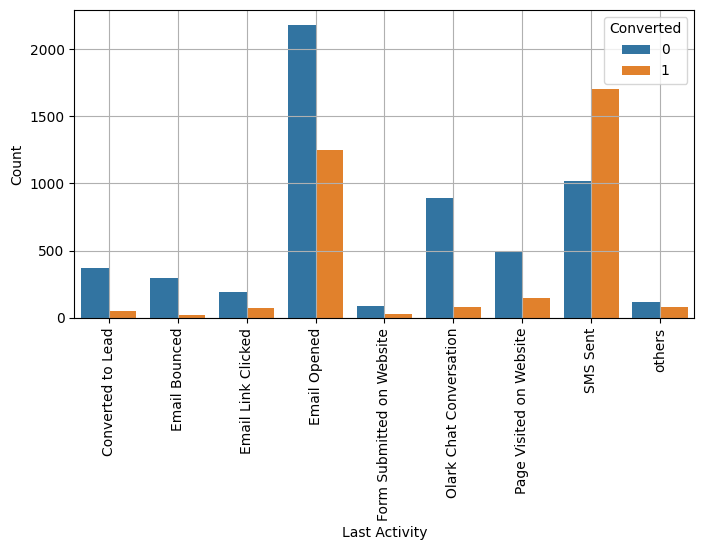

In [314]:
cat_bar('Last Activity')

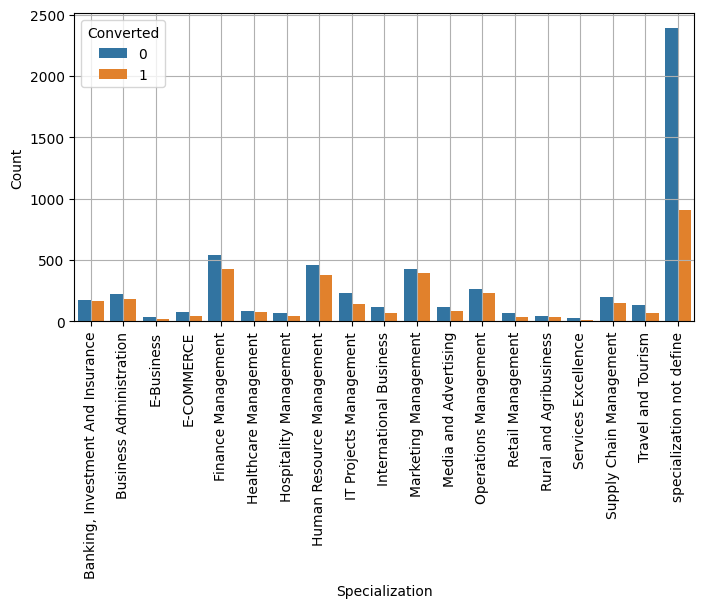

In [315]:
cat_bar('Specialization')

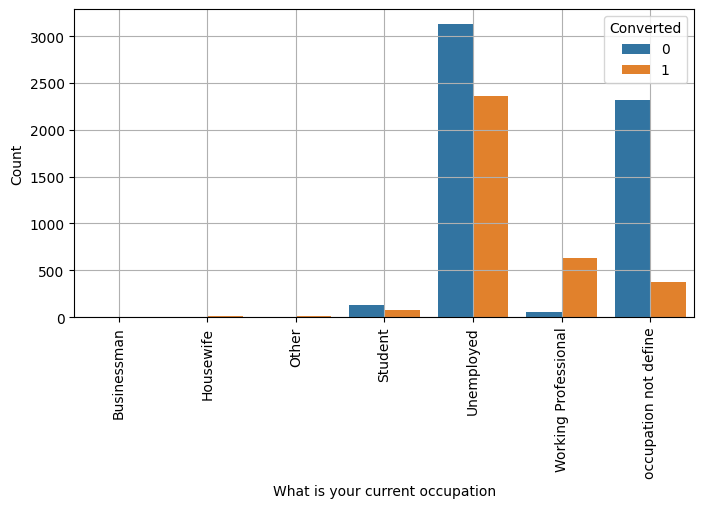

In [316]:
cat_bar('What is your current occupation')

In [317]:
# convert 'Businessman','Housewife','Other' to other
df['What is your current occupation'] = df['What is your current occupation'].apply(lambda x: 'other' if x in ['Businessman','Housewife','Other'] else x)

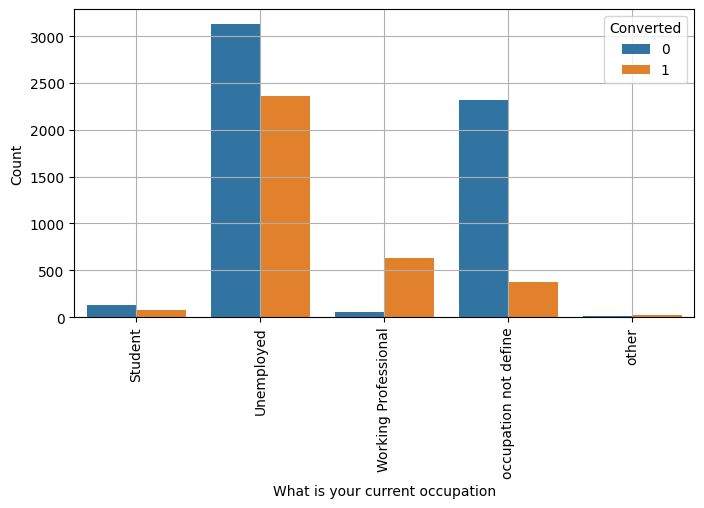

In [318]:
cat_bar('What is your current occupation')

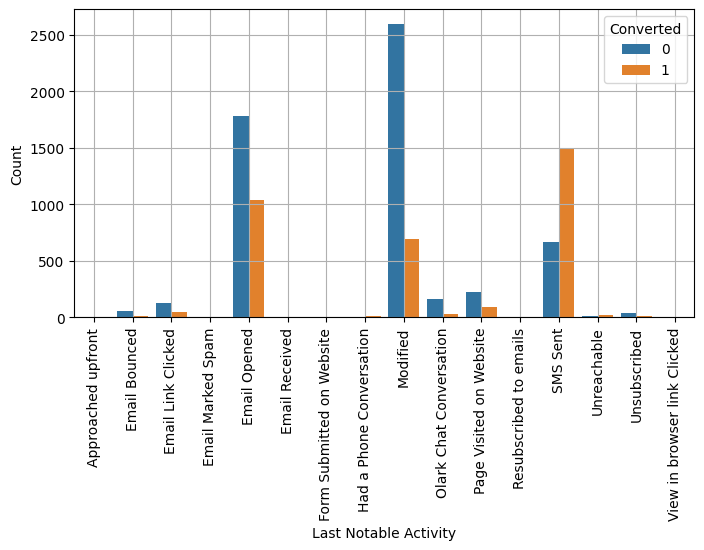

In [319]:
cat_bar('Last Notable Activity')

In [320]:
# convert other then 'Email Link Clicked','Email Opened','Modified','Olark Chat Conversation','Page Visited on Website','SMS Sent' to other
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: 'other' if x not in ['Email Link Clicked','Email Opened','Modified','Olark Chat Conversation','Page Visited on Website','SMS Sent'] else x)

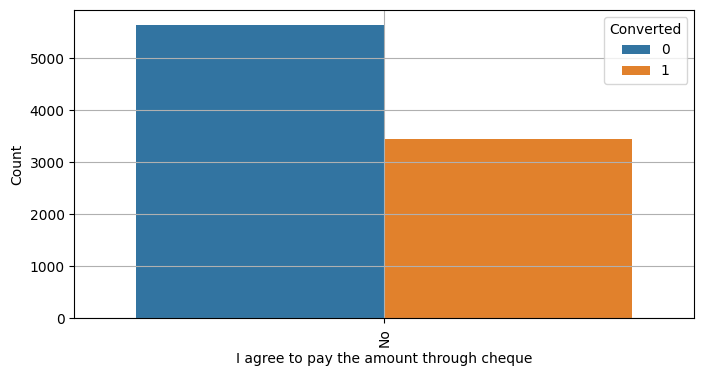

In [321]:
cat_bar('I agree to pay the amount through cheque')

In [322]:
df['I agree to pay the amount through cheque'].value_counts()

,count
I agree to pay the amount through cheque,
No,9103


I agree to pay the amount through cheque can be droped as it is only hvaing no column

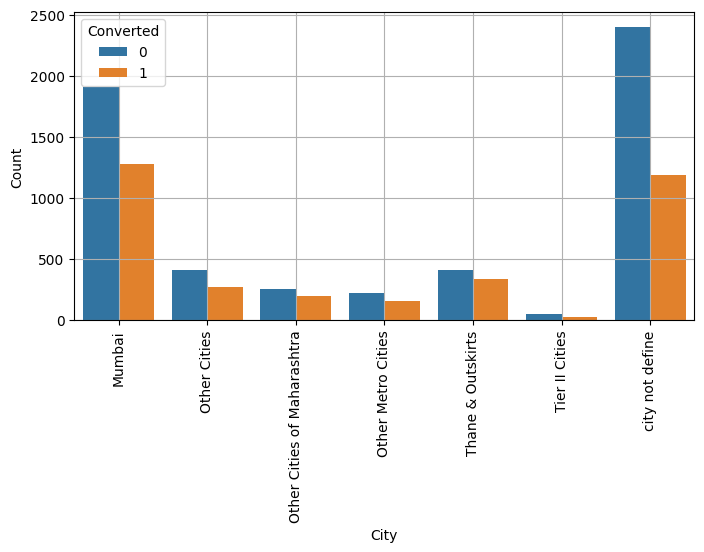

In [323]:
cat_bar('City')

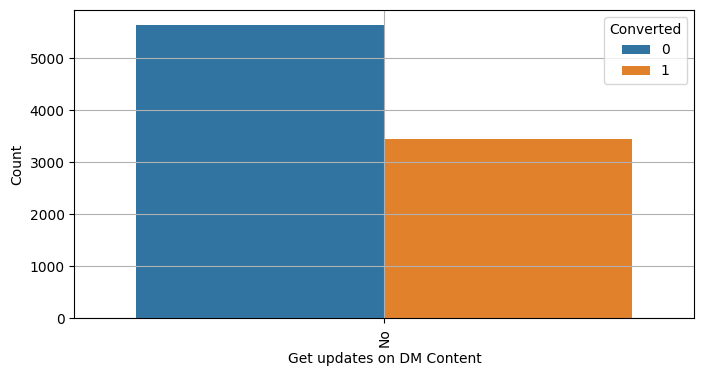

In [324]:
cat_bar('Get updates on DM Content')

In [325]:
df['Get updates on DM Content'].value_counts()

,count
Get updates on DM Content,
No,9103


**Get updates on DM Content column can be droped as it is having only one value

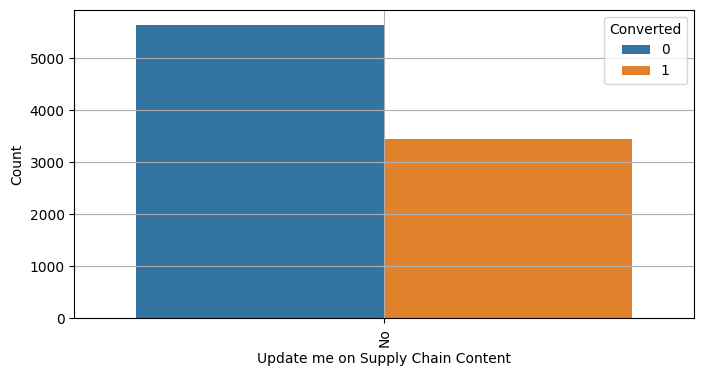

In [326]:
cat_bar('Update me on Supply Chain Content')

In [327]:
df['Update me on Supply Chain Content'].value_counts()

,count
Update me on Supply Chain Content,
No,9103


**Update me on Supply Chain Content column can be dropped

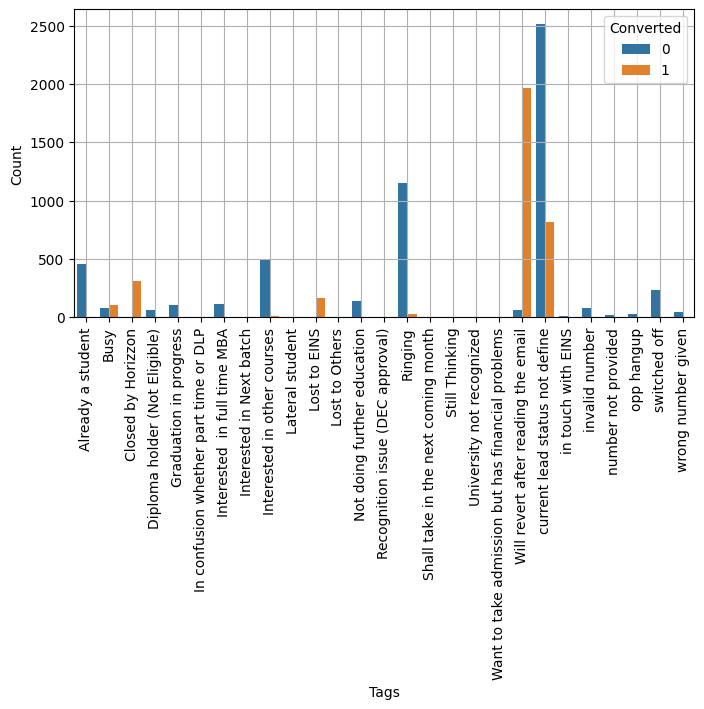

In [328]:
cat_bar('Tags')

** leads with tag 'Will revert after reading the email' and 'Closed by Horizzon' are converted to hot leads.

In [329]:
df['Tags'].value_counts()

,count
Tags,
current lead status not define,3334
Will revert after reading the email,2026
Ringing,1189
Interested in other courses,509
Already a student,465
Closed by Horizzon,311
switched off,240
Busy,185
Lost to EINS,172


In [330]:
# convert tag value to other if the value count is less then 100
df['Tags'] = df['Tags'].apply(lambda x: 'other' if df['Tags'].value_counts()[x] < 100 else x)

In [331]:
df['Tags'].value_counts()

,count
Tags,
current lead status not define,3334
Will revert after reading the email,2026
Ringing,1189
Interested in other courses,509
Already a student,465
Closed by Horizzon,311
other,300
switched off,240
Busy,185


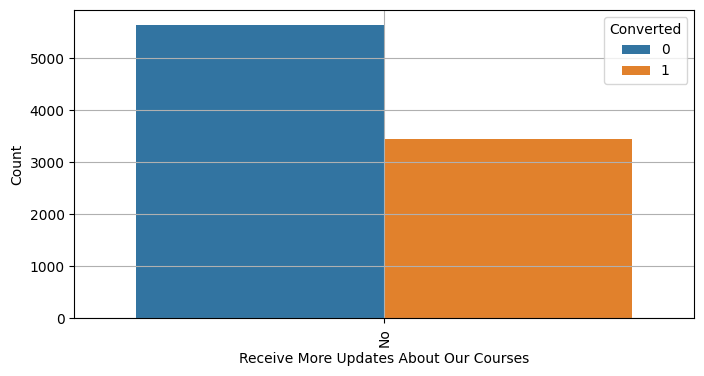

In [332]:
cat_bar('Receive More Updates About Our Courses')

** Receive More Updates About Our Courses column can be dropped

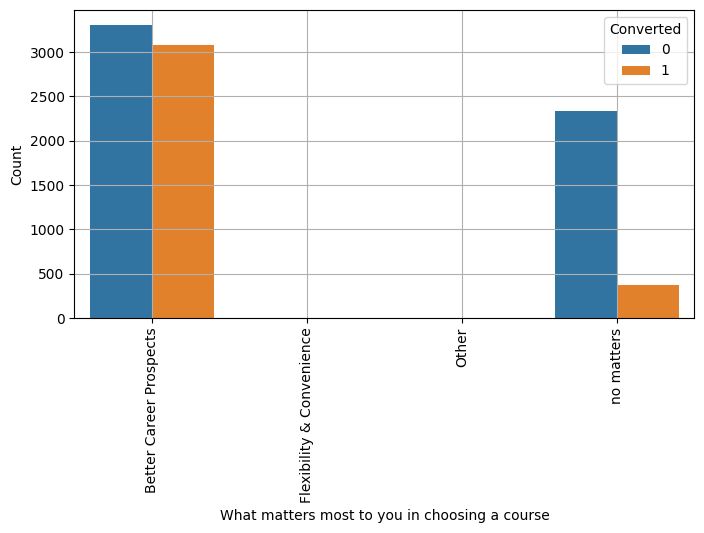

In [333]:
cat_bar('What matters most to you in choosing a course')

In [334]:
# convert 'Flexibility & Convenience, and 'Other' to 'other'
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].apply(lambda x: 'other' if x in ['Flexibility & Convenience','Other'] else x)

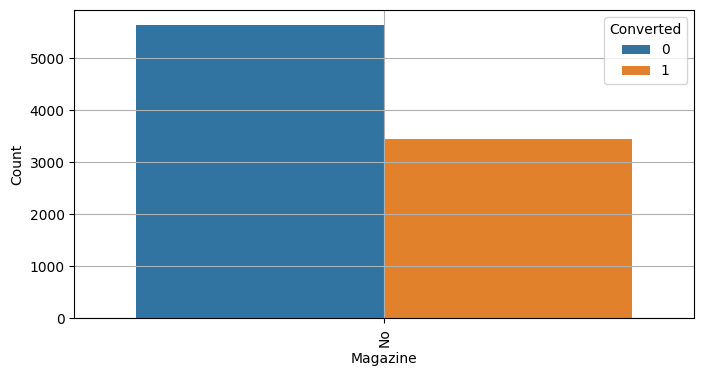

In [335]:
cat_bar('Magazine')

** 'Magazine' column can be droped

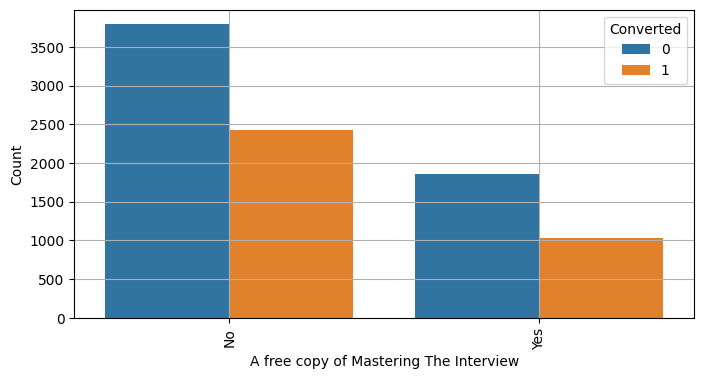

In [336]:
cat_bar('A free copy of Mastering The Interview')

In [337]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,country not define,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,city not define,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,city not define,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,others,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,specialization not define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


# Data Preparation

In [338]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [339]:
df.shape

(9103, 28)

In [340]:
# Based on above EDA some irrelevent column can be dropped
col_drop = ['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses',
            'Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine']

df = df.drop(col_drop,axis=1)

In [341]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,country not define,specialization not define,Unemployed,Better Career Prospects,No,No,Interested in other courses,city not define,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,specialization not define,Unemployed,Better Career Prospects,No,No,Ringing,city not define,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,others,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,specialization not define,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [342]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [343]:
# one hot encoding for categorical variable
cat_col = ['Lead Origin','Lead Source','Last Activity','Last Notable Activity']
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True,dtype=int)

In [344]:
cat_col2 = ['Country','Specialization','What is your current occupation','Tags',
           'What matters most to you in choosing a course','City']

In [345]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Asymmetrique Activity Index'

ml = pd.get_dummies(df_encoded['Country'], prefix='Country_',dtype=int)
ml1 = ml.drop(['Country__country not define'], axis = 1)
df_encoded = pd.concat([df_encoded,ml1], axis=1)

ml = pd.get_dummies(df_encoded['Specialization'], prefix='Specialization_',dtype=int)
ml1 = ml.drop(['Specialization__specialization not define'], axis = 1)
df_encoded = pd.concat([df_encoded,ml1], axis=1)

ml = pd.get_dummies(df_encoded['What is your current occupation'], prefix='Occupation_',dtype=int)
ml1 = ml.drop(['Occupation__occupation not define'], axis = 1)
df_encoded = pd.concat([df_encoded,ml1], axis=1)

ml = pd.get_dummies(df_encoded['What matters most to you in choosing a course'], prefix='Matter_',dtype=int)
ml1 = ml.drop(['Matter__no matters'], axis = 1)
df_encoded = pd.concat([df_encoded,ml1], axis=1)

#ml = pd.get_dummies(df_encoded['Tags'], prefix='Tags_',dtype=int)
#ml1 = ml.drop(['Tags__current lead status not define'], axis = 1)
#df_encoded = pd.concat([df_encoded,ml1], axis=1)

ml = pd.get_dummies(df_encoded['City'], prefix='City_',dtype=int)
ml1 = ml.drop(['City__city not define'], axis = 1)
df_encoded = pd.concat([df_encoded,ml1], axis=1)

In [346]:
# drop cat_col2
df_encoded.drop(cat_col2,axis=1,inplace=True)

In [347]:
df_encoded.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other,Country__India,Country__Other,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__Finance Management,Specialization__Healthcare Management,Specialization__Hospitality Management,Specialization__Human Resource Management,Specialization__IT Projects Management,Specialization__International Business,Specialization__Marketing Management,Specialization__Media and Advertising,Specialization__Operations Management,Specialization__Retail Management,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Supply Chain Management,Specialization__Travel and Tourism,Occupation__Student,Occupation__Unemployed,Occupation__Working Professional,Occupation__other,Matter__Better Career Prospects,Matter__other,City__Mumbai,City__Other Cities,City__Other Cities of Maharashtra,City__Other Metro Cities,City__Thane & Outskirts,City__Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [348]:
df_encoded.shape

(9103, 64)

In [349]:


# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create a mask for correlations greater than 0.9, excluding 1s (self-correlation)
mask = (corr_matrix.abs() > 0.9) & (corr_matrix != 1)

# Extract column pairs and their correlation values
high_corr_pairs = corr_matrix[mask]

# Convert the result into a more readable DataFrame format
high_corr_table = []

for col1 in high_corr_pairs.columns:
    for col2 in high_corr_pairs.index:
        if pd.notna(high_corr_pairs.loc[col2, col1]):
            high_corr_table.append([col1, col2, high_corr_pairs.loc[col2, col1]])

# Create a DataFrame from the list of high correlation pairs
high_corr_df = pd.DataFrame(high_corr_table, columns=['Column 1', 'Column 2', 'Correlation'])

# Display the high correlation pairs in table format
print(high_corr_df)


                  Column 1                 Column 2  Correlation
0  Lead Origin_Lead Import     Lead Source_Facebook     0.987042
1     Lead Source_Facebook  Lead Origin_Lead Import     0.987042


In [350]:
# as Lead Origin_Lead Import and Lead Source_Facebook are highly corelated we can drop one.
df_encoded.drop(['Lead Origin_Lead Import'],axis=1,inplace=True)

# Train test split

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
# Putting feature variable to X
X = df_encoded.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other,Country__India,Country__Other,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__Finance Management,Specialization__Healthcare Management,Specialization__Hospitality Management,Specialization__Human Resource Management,Specialization__IT Projects Management,Specialization__International Business,Specialization__Marketing Management,Specialization__Media and Advertising,Specialization__Operations Management,Specialization__Retail Management,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Supply Chain Management,Specialization__Travel and Tourism,Occupation__Student,Occupation__Unemployed,Occupation__Working Professional,Occupation__other,Matter__Better Career Prospects,Matter__other,City__Mumbai,City__Other Cities,City__Other Cities of Maharashtra,City__Other Metro Cities,City__Thane & Outskirts,City__Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [353]:
# Putting response variable to y
y = df_encoded['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [354]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling of numerical features

In [355]:
from sklearn.preprocessing import StandardScaler

In [356]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other,Country__India,Country__Other,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__Finance Management,Specialization__Healthcare Management,Specialization__Hospitality Management,Specialization__Human Resource Management,Specialization__IT Projects Management,Specialization__International Business,Specialization__Marketing Management,Specialization__Media and Advertising,Specialization__Operations Management,Specialization__Retail Management,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Supply Chain Management,Specialization__Travel and Tourism,Occupation__Student,Occupation__Unemployed,Occupation__Working Professional,Occupation__other,Matter__Better Career Prospects,Matter__other,City__Mumbai,City__Other Cities,City__Other Cities of Maharashtra,City__Other Metro Cities,City__Thane & Outskirts,City__Tier II Cities
7963,0,0,2.042513,2.480385,0.079748,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
5521,1,0,1.123447,-0.838592,2.326042,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1951,0,0,-0.101974,1.840074,0.329337,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1553,0,0,0.204381,1.317183,-0.169840,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
9170,0,0,-1.021040,-0.893633,-1.168192,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [357]:
### Checking the Convertion Rate
convert = (sum(df_encoded['Converted'])/len(df_encoded['Converted'].index))*100
convert

37.92156431945513

** we have 37 % convertion rate

# Model building

In [358]:
import statsmodels.api as sm

In [359]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.4
Date:                Fri, 13 Dec 2024   Deviance:                       4966.9
Time:                        13:45:58   Pearson chi2:                 6.41e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.1050      0.554     -3.798      0.000      -3.191      -1.019
Do Not Email                                         -1.1946      0.206     -5.794      0.000      -1.599      -0.791
Do Not Call                                          22.6861   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                           0.3033      0.053      5.713      0.000       0.199       0.407
Total Time Spent on Website                           1.1317      0.042     26.811      0.000       1.049       1.214
Page Views Per Visit                                 -0.2474      0.059     -4.223      0.000      -0.362      -0.133
Search                                               -1.4928      1.012     -1.475      0.140      -3.477       0.491
Through Recommendations                               1.3371      1.463      0.914      0.361      -1.531       4.205
A free copy of Mastering The Interview               -0.1492      0.113     -1.315      0.189      -0.372       0.073
Lead Origin_Landing Page Submission                  -1.1177      0.157     -7.118      0.000      -1.425      -0.810
Lead Origin_Lead Add Form                             3.6438      0.721      5.056      0.000       2.231       5.056
Lead Source_Facebook                                 -1.0720      0.574     -1.868      0.062      -2.197       0.053
Lead Source_Google                                    0.2469      0.120      2.064      0.039       0.012       0.481
Lead Source_Olark Chat                                0.2635      0.282      0.935      0.350      -0.289       0.816
Lead Source_Organic Search                            0.2523      0.134      1.884      0.060      -0.010       0.515
Lead Source_Reference                                -1.5084      0.719     -2.098      0.036      -2.917      -0.099
Lead Source_others                                    0.3117      0.343      0.909      0.363      -0.360       0.984
Last Activity_Email Bounced                          -0.5546      0.450     -1.232      0.218      -1.437       0.328
Last Activity_Email Link Clicked                      0.4023      0.400      1.007      0.314      -0.381       1.185
Last Activity_Email Opened                            0.6308      0.245      2.573      0.010       0.150       1.111
Last Activity_Form Submitted on Website               0.0909      0.393      0.231      0.817      -0.680       0.862
Last Activity_Olark Chat Conversation                -0.6242      0.277     -2.255      0.024      -1.167      -0.082
Last Activity_Page Visited on Website                 0.0799      0.297      0.269      0.788      -0.502       0.661
Last Activity_S

## Feature Selection Using RFE

In [360]:
## Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [361]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_other',
       'Country__India', 'Country__Other',
       'Specialization__Hospitality Management',
       'Occupation__Working Professional', 'Occupation__other',
       'Matter__Better Career Prospects', 'City__Mumbai', 'City__Other Cities',
       'City__Other Cities of Maharashtra', 'City__Other Metro Cities',
       'City__Thane & Outskirts', 'City__Tier II Cities'],
      dtype='object')

In [362]:
def model(X_train):
  X_train_sm = sm.add_constant(X_train)
  logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm2.fit()
  return res,X_train_sm


In [363]:
X_train = X_train[col]
res1,X_train_sm1 = model(X_train)
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.5
Date:                Fri, 13 Dec 2024   Deviance:                       5183.0
Time:                        13:46:00   Pearson chi2:                 6.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0793      0.114     -9.490      0.000      -1.302      -0.856
Do Not Email                              -1.5648      0.181     -8.666      0.000      -1.919      -1.211
Total Time Spent on Website                1.1279      0.041     27.585      0.000       1.048       1.208
Lead Origin_Landing Page Submission       -1.1765      0.132     -8.908      0.000      -1.435      -0.918
Lead Origin_Lead Add Form                  2.2847      0.220     10.397      0.000       1.854       2.715
Lead Source_Facebook                      -1.9321      0.495     -3.901      0.000      -2.903      -0.961
Last Activity_Olark Chat Conversation     -1.2438      0.165     -7.550      0.000      -1.567      -0.921
Last Activity_SMS Sent                     1.3957      0.076     18.285      0.000       1.246       1.545
Last Notable Activity_other                1.4056      0.281      5.002      0.000       0.855       1.956
Country__India                            -1.3308      0.124    -10.737      0.000      -1.574      -1.088
Country__Other                            -1.8182      0.242     -7.505      0.000      -2.293      -1.343
Specialization__Hospitality Management    -0.9294      0.326     -2.854      0.004      -1.568      -0.291
Occupation__Working Professional           2.3854      0.186     12.823      0.000       2.021       2.750
Occupation__other                          0.8912      0.489      1.821      0.069      -0.068       1.850
Matter__Better Career Prospects            1.2413      0.087     14.197      0.000       1.070       1.413
City__Mumbai                               1.1056      0.140      7.875      0.000       0.830       1.381
City__Other Cities                         1.2064      0.175      6.912      0.000       0.864       1.548
City__Other Cities of Maharashtra          0.9861      0.201      4.905      0.000       0.592       1.380
City__Other Metro Cities                   1.1288      0.206      5.483      0.000       0.725       1.532
City__Thane & Outskirts                    1.1132      0.165      6.744      0.000       0.790       1.437
City__Tier II Cities                       1.0722      0.416      2.577      0.010       0.257       1.887
==========================================================================================================
"""

In [364]:
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_sm1)
y_train_pred[:10]

,0
7963,0.995223
5521,0.006748
1951,0.712330
1553,0.561186
9170,0.300273
5097,0.110337
8953,0.446989
308,0.418638
5520,0.038085
1045,0.170312


In [365]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
7963,1,0.995223
5521,0,0.006748
1951,1,0.712330
1553,1,0.561186
9170,0,0.300273


In [366]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.apply(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
7963,1,0.995223,1
5521,0,0.006748,0
1951,1,0.712330,0
1553,1,0.561186,0
9170,0,0.300273,0


In [367]:
from sklearn import metrics

In [368]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3784  137]
 [1397 1054]]


In [369]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7592592592592593


# Checking VIF

In [370]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [371]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF(X_train):
  vif = pd.DataFrame()
  vif['Features'] = X_train.columns
  vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return(vif)

In [372]:
VIF(X_train)

,Features,VIF
2,Lead Origin_Landing Page Submission,7.77
14,City__Mumbai,5.34
8,Country__India,5.27
13,Matter__Better Career Prospects,3.20
18,City__Thane & Outskirts,1.90
15,City__Other Cities,1.89
16,City__Other Cities of Maharashtra,1.64
17,City__Other Metro Cities,1.55
6,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47


In [373]:
# drop Lead Origin_Landing Page Submission as it is having high VIF
X_train2 = X_train_sm1.drop(['Lead Origin_Landing Page Submission'],axis=1)

In [374]:
res2,X_train_sm2 = model(X_train2)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Fri, 13 Dec 2024   Deviance:                       5265.6
Time:                        13:46:01   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0363      0.113     -9.204      0.000      -1.257      -0.816
Do Not Email                              -1.6444      0.178     -9.213      0.000      -1.994      -1.295
Total Time Spent on Website                1.1217      0.041     27.670      0.000       1.042       1.201
Lead Origin_Lead Add Form                  2.5655      0.218     11.772      0.000       2.138       2.993
Lead Source_Facebook                      -1.1188      0.483     -2.317      0.021      -2.065      -0.172
Last Activity_Olark Chat Conversation     -1.1916      0.163     -7.302      0.000      -1.511      -0.872
Last Activity_SMS Sent                     1.3388      0.075     17.764      0.000       1.191       1.487
Last Notable Activity_other                1.4414      0.276      5.231      0.000       0.901       1.981
Country__India                            -1.5462      0.122    -12.692      0.000      -1.785      -1.307
Country__Other                            -2.0646      0.239     -8.648      0.000      -2.533      -1.597
Specialization__Hospitality Management    -0.8697      0.314     -2.766      0.006      -1.486      -0.253
Occupation__Working Professional           2.3785      0.185     12.859      0.000       2.016       2.741
Occupation__other                          1.0388      0.487      2.133      0.033       0.084       1.993
Matter__Better Career Prospects            1.2666      0.087     14.590      0.000       1.096       1.437
City__Mumbai                               0.2195      0.097      2.265      0.023       0.030       0.409
City__Other Cities                         0.3680      0.144      2.558      0.011       0.086       0.650
City__Other Cities of Maharashtra          0.1049      0.173      0.608      0.543      -0.233       0.443
City__Other Metro Cities                   0.2392      0.176      1.355      0.175      -0.107       0.585
City__Thane & Outskirts                    0.3140      0.135      2.324      0.020       0.049       0.579
City__Tier II Cities                       0.0779      0.401      0.194      0.846      -0.708       0.864
==========================================================================================================
"""

In [375]:
VIF(X_train2)

,Features,VIF
0,const,10.53
8,Country__India,2.42
14,City__Mumbai,1.77
3,Lead Origin_Lead Add Form,1.46
2,Total Time Spent on Website,1.35
5,Last Activity_Olark Chat Conversation,1.33
9,Country__Other,1.29
18,City__Thane & Outskirts,1.28
15,City__Other Cities,1.27
16,City__Other Cities of Maharashtra,1.20


In [376]:
# drop City__Tier II Cities as it has high p value
X_train3 = X_train2.drop(['City__Tier II Cities'],axis=1)


In [377]:
res3,X_train_sm3 = model(X_train3)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Fri, 13 Dec 2024   Deviance:                       5265.7
Time:                        13:46:01   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0360      0.113     -9.202      0.000      -1.257      -0.815
Do Not Email                              -1.6431      0.178     -9.210      0.000      -1.993      -1.293
Total Time Spent on Website                1.1218      0.041     27.672      0.000       1.042       1.201
Lead Origin_Lead Add Form                  2.5659      0.218     11.775      0.000       2.139       2.993
Lead Source_Facebook                      -1.1164      0.483     -2.313      0.021      -2.063      -0.170
Last Activity_Olark Chat Conversation     -1.1924      0.163     -7.309      0.000      -1.512      -0.873
Last Activity_SMS Sent                     1.3387      0.075     17.762      0.000       1.191       1.486
Last Notable Activity_other                1.4397      0.275      5.227      0.000       0.900       1.980
Country__India                            -1.5437      0.121    -12.748      0.000      -1.781      -1.306
Country__Other                            -2.0620      0.238     -8.651      0.000      -2.529      -1.595
Specialization__Hospitality Management    -0.8684      0.314     -2.763      0.006      -1.484      -0.252
Occupation__Working Professional           2.3794      0.185     12.865      0.000       2.017       2.742
Occupation__other                          1.0401      0.487      2.137      0.033       0.086       1.994
Matter__Better Career Prospects            1.2668      0.087     14.593      0.000       1.097       1.437
City__Mumbai                               0.2164      0.096      2.265      0.024       0.029       0.404
City__Other Cities                         0.3651      0.143      2.552      0.011       0.085       0.645
City__Other Cities of Maharashtra          0.1019      0.172      0.593      0.553      -0.235       0.439
City__Other Metro Cities                   0.2361      0.176      1.343      0.179      -0.108       0.581
City__Thane & Outskirts                    0.3110      0.134      2.317      0.021       0.048       0.574
==========================================================================================================
"""

In [378]:
# Drop City__Other Cities of Maharashtra as it has high p value
X_train4 = X_train3.drop(['City__Other Cities of Maharashtra'],axis=1)

In [379]:
res4,X_train_sm4 = model(X_train4)
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.0
Date:                Fri, 13 Dec 2024   Deviance:                       5266.0
Time:                        13:46:01   Pearson chi2:                 6.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0334      0.112     -9.188      0.000      -1.254      -0.813
Do Not Email                              -1.6442      0.179     -9.209      0.000      -1.994      -1.294
Total Time Spent on Website                1.1225      0.041     27.698      0.000       1.043       1.202
Lead Origin_Lead Add Form                  2.5709      0.218     11.804      0.000       2.144       2.998
Lead Source_Facebook                      -1.0678      0.476     -2.244      0.025      -2.000      -0.135
Last Activity_Olark Chat Conversation     -1.1976      0.163     -7.352      0.000      -1.517      -0.878
Last Activity_SMS Sent                     1.3394      0.075     17.773      0.000       1.192       1.487
Last Notable Activity_other                1.4408      0.275      5.232      0.000       0.901       1.981
Country__India                            -1.5283      0.118    -12.934      0.000      -1.760      -1.297
Country__Other                            -2.0418      0.236     -8.660      0.000      -2.504      -1.580
Specialization__Hospitality Management    -0.8675      0.314     -2.761      0.006      -1.483      -0.252
Occupation__Working Professional           2.3808      0.185     12.877      0.000       2.018       2.743
Occupation__other                          1.0374      0.487      2.130      0.033       0.083       1.992
Matter__Better Career Prospects            1.2692      0.087     14.635      0.000       1.099       1.439
City__Mumbai                               0.1962      0.089      2.200      0.028       0.021       0.371
City__Other Cities                         0.3449      0.139      2.483      0.013       0.073       0.617
City__Other Metro Cities                   0.2157      0.172      1.252      0.211      -0.122       0.553
City__Thane & Outskirts                    0.2916      0.130      2.240      0.025       0.036       0.547
==========================================================================================================
"""

In [380]:
# Drop City__Other Metro Cities as it has high p value
X_train5 = X_train4.drop(['City__Other Metro Cities'],axis=1)

In [381]:
res5,X_train_sm5 = model(X_train5)
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.8
Date:                Fri, 13 Dec 2024   Deviance:                       5267.6
Time:                        13:46:02   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0300      0.112     -9.168      0.000      -1.250      -0.810
Do Not Email                              -1.6343      0.178     -9.163      0.000      -1.984      -1.285
Total Time Spent on Website                1.1221      0.041     27.695      0.000       1.043       1.201
Lead Origin_Lead Add Form                  2.5761      0.218     11.829      0.000       2.149       3.003
Lead Source_Facebook                      -1.0438      0.474     -2.201      0.028      -1.973      -0.114
Last Activity_Olark Chat Conversation     -1.2055      0.163     -7.409      0.000      -1.524      -0.887
Last Activity_SMS Sent                     1.3390      0.075     17.772      0.000       1.191       1.487
Last Notable Activity_other                1.4333      0.276      5.202      0.000       0.893       1.973
Country__India                            -1.5003      0.116    -12.958      0.000      -1.727      -1.273
Country__Other                            -2.0120      0.235     -8.578      0.000      -2.472      -1.552
Specialization__Hospitality Management    -0.8506      0.314     -2.712      0.007      -1.465      -0.236
Occupation__Working Professional           2.3851      0.185     12.898      0.000       2.023       2.748
Occupation__other                          1.0424      0.489      2.134      0.033       0.085       2.000
Matter__Better Career Prospects            1.2729      0.087     14.689      0.000       1.103       1.443
City__Mumbai                               0.1624      0.085      1.913      0.056      -0.004       0.329
City__Other Cities                         0.3116      0.136      2.288      0.022       0.045       0.579
City__Thane & Outskirts                    0.2592      0.127      2.033      0.042       0.009       0.509
==========================================================================================================
"""

In [382]:
# Drop City__Mumbai as it has high p value
X_train6 = X_train5.drop(['City__Mumbai'],axis=1)

In [383]:
res6,X_train_sm6 = model(X_train6)
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.6
Date:                Fri, 13 Dec 2024   Deviance:                       5271.2
Time:                        13:46:02   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0202      0.112     -9.105      0.000      -1.240      -0.801
Do Not Email                              -1.6317      0.178     -9.146      0.000      -1.981      -1.282
Total Time Spent on Website                1.1216      0.040     27.709      0.000       1.042       1.201
Lead Origin_Lead Add Form                  2.6150      0.217     12.046      0.000       2.190       3.040
Lead Source_Facebook                      -0.9883      0.474     -2.084      0.037      -1.918      -0.059
Last Activity_Olark Chat Conversation     -1.2246      0.162     -7.548      0.000      -1.543      -0.907
Last Activity_SMS Sent                     1.3343      0.075     17.724      0.000       1.187       1.482
Last Notable Activity_other                1.4202      0.275      5.169      0.000       0.882       1.959
Country__India                            -1.4221      0.108    -13.198      0.000      -1.633      -1.211
Country__Other                            -1.9495      0.232     -8.407      0.000      -2.404      -1.495
Specialization__Hospitality Management    -0.8347      0.313     -2.663      0.008      -1.449      -0.220
Occupation__Working Professional           2.3880      0.185     12.909      0.000       2.025       2.751
Occupation__other                          1.0588      0.488      2.170      0.030       0.103       2.015
Matter__Better Career Prospects            1.2803      0.087     14.792      0.000       1.111       1.450
City__Other Cities                         0.2251      0.128      1.754      0.079      -0.026       0.477
City__Thane & Outskirts                    0.1726      0.119      1.449      0.147      -0.061       0.406
==========================================================================================================
"""

In [384]:
# Drop City__Thane & Outskirts as it has high p value
X_train7 = X_train6.drop(['City__Thane & Outskirts'],axis=1)

In [385]:
res7,X_train_sm7 = model(X_train7)
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.7
Date:                Fri, 13 Dec 2024   Deviance:                       5273.3
Time:                        13:46:02   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0121      0.112     -9.053      0.000      -1.231      -0.793
Do Not Email                              -1.6361      0.178     -9.166      0.000      -1.986      -1.286
Total Time Spent on Website                1.1231      0.040     27.757      0.000       1.044       1.202
Lead Origin_Lead Add Form                  2.6314      0.217     12.131      0.000       2.206       3.057
Lead Source_Facebook                      -0.9828      0.475     -2.070      0.038      -1.913      -0.052
Last Activity_Olark Chat Conversation     -1.2321      0.162     -7.602      0.000      -1.550      -0.914
Last Activity_SMS Sent                     1.3308      0.075     17.691      0.000       1.183       1.478
Last Notable Activity_other                1.4156      0.275      5.150      0.000       0.877       1.954
Country__India                            -1.4098      0.107    -13.133      0.000      -1.620      -1.199
Country__Other                            -1.9419      0.232     -8.372      0.000      -2.396      -1.487
Specialization__Hospitality Management    -0.8218      0.313     -2.629      0.009      -1.435      -0.209
Occupation__Working Professional           2.3928      0.185     12.930      0.000       2.030       2.756
Occupation__other                          1.0589      0.489      2.164      0.030       0.100       2.018
Matter__Better Career Prospects            1.2818      0.087     14.816      0.000       1.112       1.451
City__Other Cities                         0.2053      0.128      1.609      0.108      -0.045       0.455
==========================================================================================================
"""

In [386]:
# Drop City__Other Cities as it has high p value
X_train8 = X_train7.drop(['City__Other Cities'],axis=1)

In [387]:
res8,X_train_sm8 = model(X_train8)
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.9
Date:                Fri, 13 Dec 2024   Deviance:                       5275.9
Time:                        13:46:02   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0088      0.112     -9.032      0.000      -1.228      -0.790
Do Not Email                              -1.6378      0.178     -9.178      0.000      -1.988      -1.288
Total Time Spent on Website                1.1226      0.040     27.750      0.000       1.043       1.202
Lead Origin_Lead Add Form                  2.6289      0.217     12.122      0.000       2.204       3.054
Lead Source_Facebook                      -0.9689      0.473     -2.047      0.041      -1.897      -0.041
Last Activity_Olark Chat Conversation     -1.2405      0.162     -7.655      0.000      -1.558      -0.923
Last Activity_SMS Sent                     1.3292      0.075     17.678      0.000       1.182       1.477
Last Notable Activity_other                1.4248      0.275      5.190      0.000       0.887       1.963
Country__India                            -1.3978      0.107    -13.067      0.000      -1.607      -1.188
Country__Other                            -1.8993      0.230     -8.251      0.000      -2.350      -1.448
Specialization__Hospitality Management    -0.8170      0.313     -2.614      0.009      -1.430      -0.204
Occupation__Working Professional           2.3914      0.185     12.926      0.000       2.029       2.754
Occupation__other                          1.0705      0.490      2.185      0.029       0.110       2.031
Matter__Better Career Prospects            1.2868      0.086     14.886      0.000       1.117       1.456
==========================================================================================================
"""

In [388]:
VIF(X_train8)

,Features,VIF
0,const,10.40
8,Country__India,1.97
3,Lead Origin_Lead Add Form,1.45
2,Total Time Spent on Website,1.34
5,Last Activity_Olark Chat Conversation,1.30
9,Country__Other,1.22
13,Matter__Better Career Prospects,1.13
1,Do Not Email,1.12
7,Last Notable Activity_other,1.12
6,Last Activity_SMS Sent,1.11


In [389]:
# Getting the predicted values on the train set
y_train_pred8 = res8.predict(X_train_sm8)
y_train_pred8[:10]

,0
7963,0.995437
5521,0.006787
1951,0.720265
1553,0.588748
9170,0.326245
5097,0.117947
8953,0.457983
308,0.417062
5520,0.119261
1045,0.188178


In [390]:
y_train_pred_final8 = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred8*100})
y_train_pred_final8.head()

,Converted,Converted_prob
7963,1,99.543708
5521,0,0.678741
1951,1,72.026527
1553,1,58.874788
9170,0,32.624522


In [391]:
y_train_pred_final8['predicted'] = y_train_pred_final8.Converted_prob.apply(lambda x: 1 if x >80 else 0)

# Let's see the head
y_train_pred_final8.head()

,Converted,Converted_prob,predicted
7963,1,99.543708,1
5521,0,0.678741,0
1951,1,72.026527,0
1553,1,58.874788,0
9170,0,32.624522,0


In [392]:
from sklearn import metrics

In [393]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final8.Converted, y_train_pred_final8.predicted )
print(confusion)

[[3787  134]
 [1440 1011]]


In [394]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final8.Converted, y_train_pred_final8.predicted))

0.7529817953546767


In [395]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final8[i] = y_train_pred_final8.Converted_prob.apply(lambda x: 1 if x >i*100 else 0)
y_train_pred_final8.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7963,1,99.543708,1,1,1,1,1,1,1,1,1,1,1
5521,0,0.678741,0,1,0,0,0,0,0,0,0,0,0
1951,1,72.026527,0,1,1,1,1,1,1,1,1,0,0
1553,1,58.874788,0,1,1,1,1,1,1,0,0,0,0
9170,0,32.624522,0,1,1,1,1,0,0,0,0,0,0


In [396]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final8.Converted, y_train_pred_final8[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.585060  0.985312  0.334864
0.2   0.2  0.761142  0.915953  0.664371
0.3   0.3  0.794256  0.878009  0.741903
0.4   0.4  0.810264  0.767034  0.837286
0.5   0.5  0.808067  0.691962  0.880643
0.6   0.6  0.800063  0.621787  0.911502
0.7   0.7  0.775110  0.507548  0.942362
0.8   0.8  0.752982  0.412485  0.965825
0.9   0.9  0.703547  0.248878  0.987758


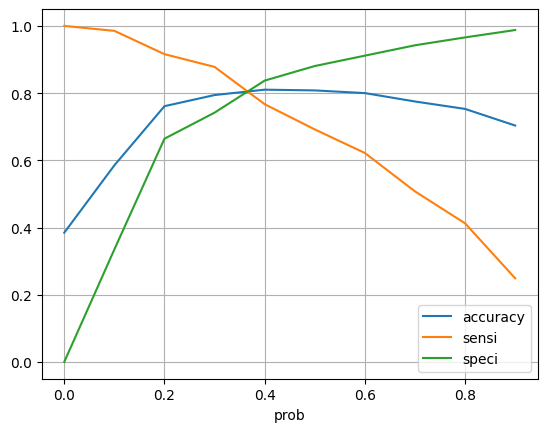

In [397]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

In [398]:
y_train_pred_final8['final_predict'] = y_train_pred_final8.Converted_prob.apply(lambda x: 1 if x >36 else 0)

In [399]:
y_train_pred_final8

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
7963,1,99.543708,1,1,1,1,1,1,1,1,1,1,1,1
5521,0,0.678741,0,1,0,0,0,0,0,0,0,0,0,0
1951,1,72.026527,0,1,1,1,1,1,1,1,1,0,0,1
1553,1,58.874788,0,1,1,1,1,1,1,0,0,0,0,1
9170,0,32.624522,0,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,11.794654,0,1,1,0,0,0,0,0,0,0,0,0
82,1,84.107263,1,1,1,1,1,1,1,1,1,1,0,1
8170,0,17.741188,0,1,1,0,0,0,0,0,0,0,0,0
7054,0,3.416257,0,1,0,0,0,0,0,0,0,0,0,0


In [400]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final8.Converted, y_train_pred_final8['final_predict']))

0.8060263653483992


# Prediction on Test set

In [401]:
# Standardise 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' columns in test set using scalar.transform
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [402]:
X_test = X_test[X_train8.drop('const',axis=1).columns]

In [403]:
# add const to X-test
X_test = sm.add_constant(X_test)

In [404]:
X_test.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Facebook,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_other,Country__India,Country__Other,Specialization__Hospitality Management,Occupation__Working Professional,Occupation__other,Matter__Better Career Prospects
3497,1.0,0,-0.893633,1,0,0,0,0,0,0,0,0,0,1
4044,1.0,0,-0.893633,0,0,0,1,0,0,0,0,0,0,1
7200,1.0,0,-0.618427,0,0,0,0,0,1,0,0,0,0,1
1183,1.0,0,-0.893633,0,0,0,0,0,0,0,0,0,0,1
8216,1.0,0,-0.829418,0,0,0,0,0,1,0,0,0,0,0


In [405]:
# Getting the predicted values on the test set
y_test_pred = res8.predict(X_test)
y_test_pred[:10]

,0
3497,0.870310
4044,0.646566
7200,0.140145
1183,0.326245
8216,0.034299
8746,0.326245
9047,0.026102
6526,0.431110
7694,0.117947
8184,0.889079


In [406]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred*100})
y_test_pred_final.head()

,Converted,Converted_prob
3497,1,87.030955
4044,1,64.656563
7200,0,14.014487
1183,0,32.624522
8216,0,3.429875


In [407]:
y_test_pred_final['final_predict'] = y_test_pred_final.Converted_prob.apply(lambda x: 1 if x >36 else 0)

In [408]:
y_test_pred_final.head()

,Converted,Converted_prob,final_predict
3497,1,87.030955,1
4044,1,64.656563,1
7200,0,14.014487,0
1183,0,32.624522,0
8216,0,3.429875,0


In [409]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['final_predict']))

0.8026363969242036
